## Question 2

Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it
effectively visualize what is being asked? Why or why not ?


I choose compare my visulization to https://github.com/chao-h/ds5500hw1/blob/master/README.md. The similar points of my and his visulization is we both use map graph to visulize the change cross country. The different points are his graph are animated graph and mine are static graphs. His visulization is good for seeing the trend of the income change across the contry and time, and the different color stands for the scale of income, which send the income information change very efficient.

## Question 3

* Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (relationship
between income, life expectancy, and child mortality over time). Include a link to the original.
Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it
effectively visualize what is being asked? Why or why not?



I choose compare my visulization to https://github.com/philip-johnson-2/ds5500-hw1. The different is I try to encode all information in to one graph by using the circle size, and use animated graph to encode time information. While philip use multiple line chart to show the relation cross time. Overall the visulization effectively shows what is being asked but his visulization will be better if the information can be encoded on the same graph.

## Question 4


* Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)

* Visualize the model(s) and comment on what they tell you about the relationship between income and life
expectancy over time.



I used linear regression to fit the relation between average gdp and average life expandency. First I plot trend of global average life expandency and average gdp cross time. I found out the global life expandency and gdp are increasing in a roughly linear way cross time. So I use linear regression. As the model shows, over all live expandency and gdp are good fitted by using linear model. But when gpd are at a very low level (4000 to 5000), the life expandency increase according to gdp will be more significant.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
%matplotlib notebook

In [145]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [146]:
gdpdata = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
lifedata = pd.read_csv("data/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
populationdata = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")

gdpdata.dropna(inplace = True)
lifedata.dropna(inplace = True)
populationdata.dropna(inplace = True)

In [147]:
data = pd.merge(gdpdata, lifedata, on = ["geo", "time"], how = "inner" )
data = pd.merge(data, populationdata, on = ["geo", "time"], how = "inner")

In [165]:
data["gdp_total"] = data["gdppercapita_us_inflation_adjusted"]*data["population_total"]
data["life_total"] = data["life_expectancy_years"] * data["population_total"]
grouped_data = data[["time", "gdp_total", "life_total","population_total"]].groupby("time").sum()
grouped_data["life_avg"] = grouped_data["life_total"] / grouped_data["population_total"]
grouped_data["gdp_avg"] = grouped_data["gdp_total"] / grouped_data["population_total"]

In [166]:
grouped_data.head(5)

,gdp_total,life_total,population_total,life_avg,gdp_avg
time,,,,,
1960,9.104672e+12,1.158298e+11,2411234555,48.037548,3775.937939
1961,9.498389e+12,1.214688e+11,2470767875,49.162377,3844.306631
1962,1.002300e+13,1.314901e+11,2519054144,52.198192,3978.875693
1963,1.054055e+13,1.399572e+11,2569354786,54.471729,4102.409690
1964,1.123669e+13,1.448578e+11,2622052707,55.245941,4285.456132


<IPython.core.display.Javascript object>


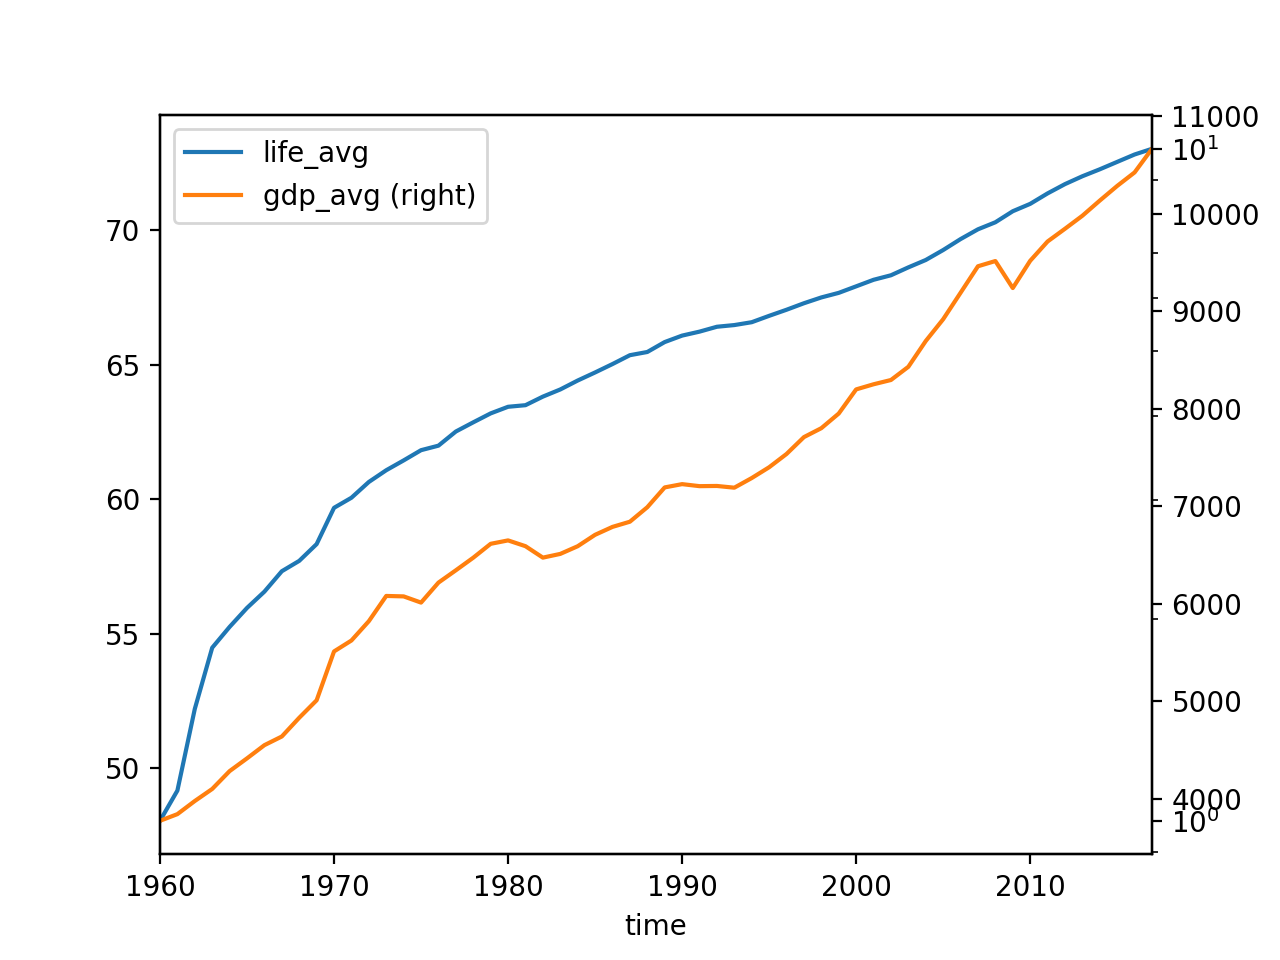

In [167]:
plot_data = grouped_data[["life_avg", "gdp_avg"]]
ax = plot_data.plot(secondary_y='gdp_avg')
ax2 = ax.twinx()
ax2.set_yscale('log')

In [168]:
X = grouped_data["gdp_avg"].values.reshape(-1, 1)
Y = grouped_data["life_avg"].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

<IPython.core.display.Javascript object>


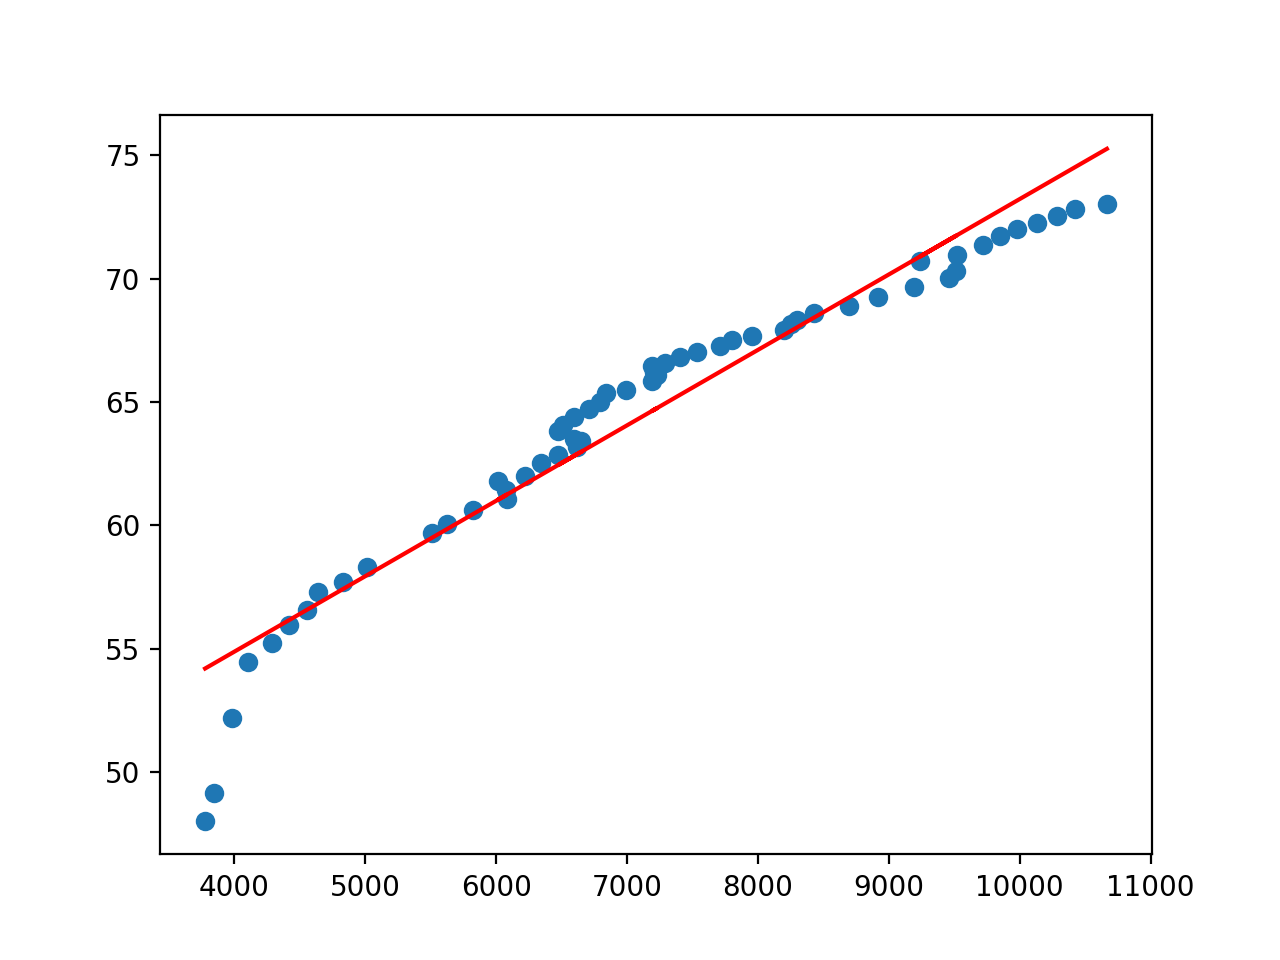

In [171]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

<IPython.core.display.Javascript object>


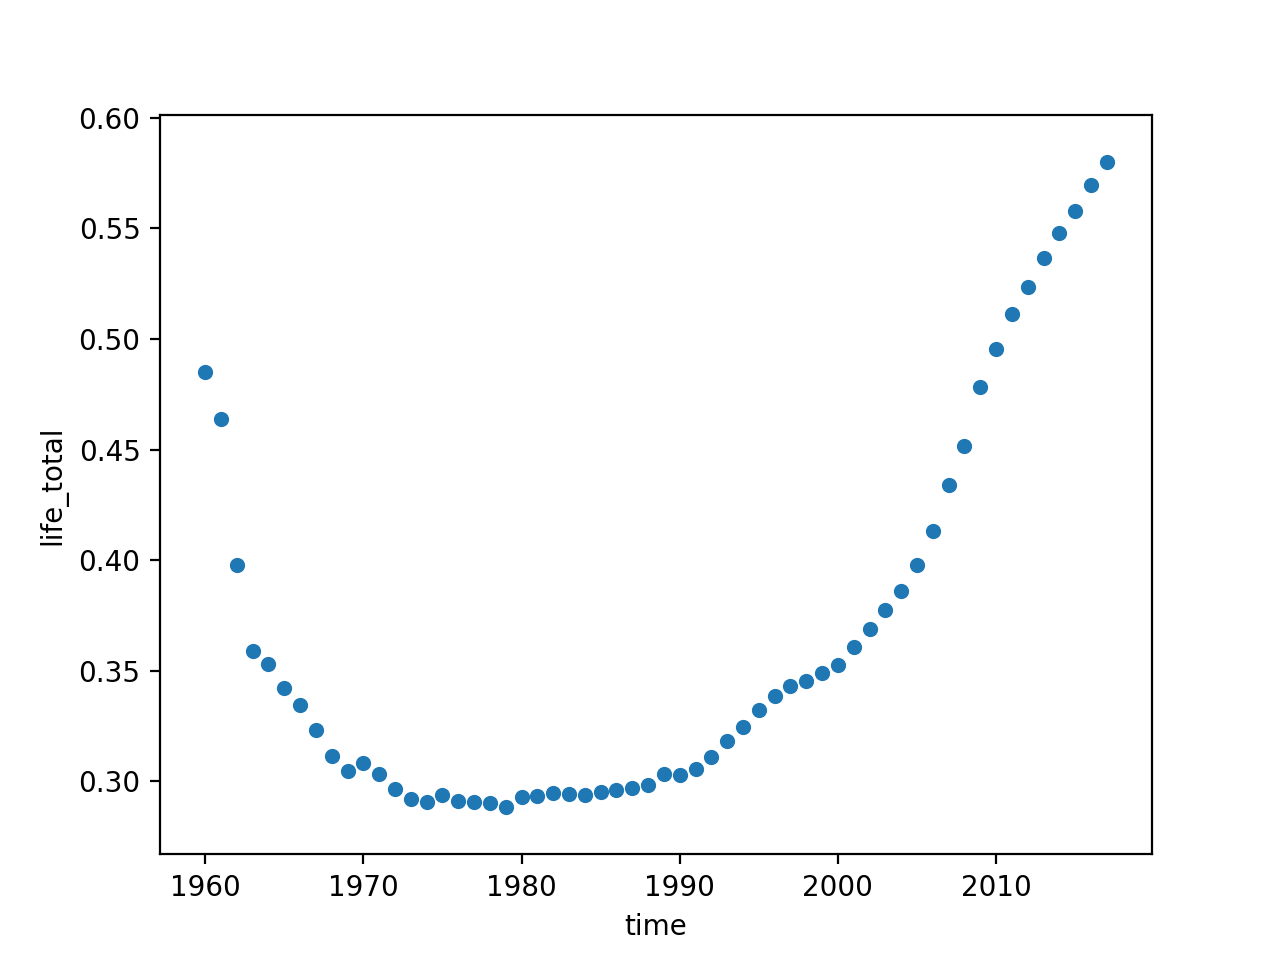

In [170]:
cov_data = data[["time", "gdp_total", "life_total"]].groupby("time").corr()
cov_data = cov_data.reset_index()[["time","life_total", "level_1"]]
cov_data = cov_data.loc[cov_data["level_1"] == "gdp_total"]
cov_data.plot.scatter(x = "time", y = "life_total")

## Question 5

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child
mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required
to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)
Visualize the model(s) and comment on what they tell you about the relationship between income and child
mortality over time.


First I calculated the global average child mortality per 1000 new born and global average gdp accross time. After plotting, I found the gdp is gradually increasing since 1960. However, for child mortality, there is a huge increase around 1965 - 1970. And gradually decrease across time. I use linear model to fit the relation between child mortality and average gdp. It turns out when gdp is at a every low level, the child mortality. Overall, child mortality rate decrease when gdp level increase.

In [237]:
childdata = pd.read_csv("data/ddf--datapoints--newborn_mortality_rate_per_1000--by--geo--time.csv")
borndata = pd.read_csv("data/ddf--datapoints--new_births_total_number_estimated--by--geo--time.csv")
populationdata = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")
gdpdata = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")

childdata.dropna(inplace = True)
gdpdata.dropna(inplace = True)
borndata.dropna(inplace = True)
populationdata.dropna(inplace = True)


In [285]:
child_gdp_data = pd.merge(gdpdata, childdata, on = ["geo", "time"], how = "left" )
child_gdp_data = pd.merge(child_gdp_data, populationdata, on = ["geo", "time"], how = "left")
child_gdp_data = pd.merge(child_gdp_data, borndata, on = ["geo", "time"], how = "left")
child_gdp_data["total_mortality"] = child_gdp_data["new_births_total_number_estimated"] * child_gdp_data["newborn_mortality_rate_per_1000"] / 1000
child_gdp_data["total_gdp"] = child_gdp_data["gdppercapita_us_inflation_adjusted"]* child_gdp_data["population_total"]
grouped_child_gdp_data = child_gdp_data.groupby("time").sum()
grouped_child_gdp_data["avg_gdp"] = grouped_child_gdp_data["total_gdp"] / grouped_child_gdp_data["population_total"]
grouped_child_gdp_data["avg_mortality"] = grouped_child_gdp_data["total_mortality"] / grouped_child_gdp_data["new_births_total_number_estimated"] *1000
grouped_child_gdp_data.dropna(inplace = True)
child_gdp_data.dropna(inplace = True)

<IPython.core.display.Javascript object>


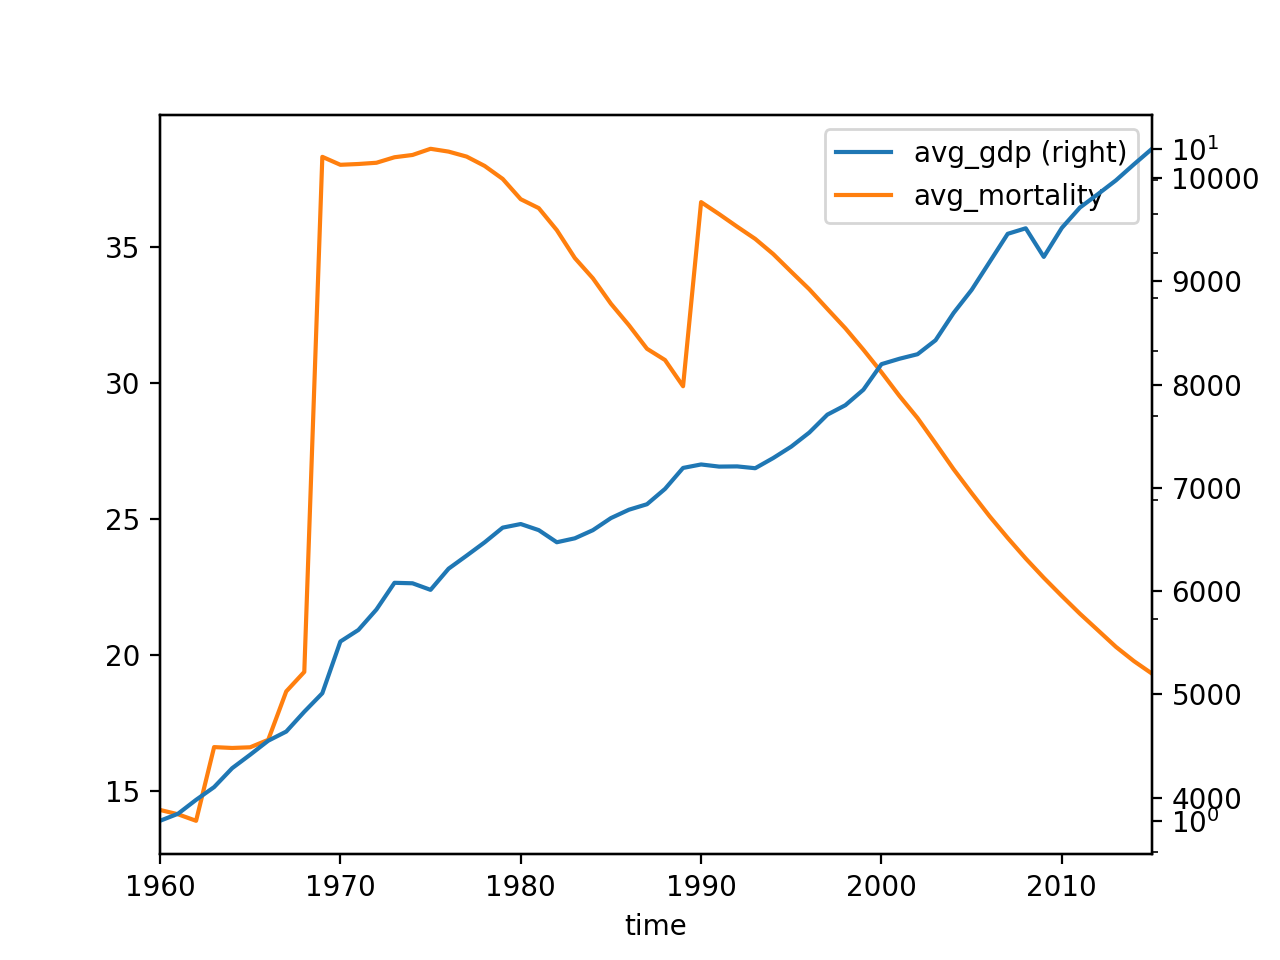

In [288]:
plot_child_data = grouped_child_gdp_data[["avg_gdp", "avg_mortality"]]
ax = plot_child_data.plot(secondary_y='avg_gdp')
ax2 = ax.twinx()
ax2.set_yscale('log')

In [289]:
X = grouped_child_gdp_data["avg_gdp"].values.reshape(-1, 1)
Y = grouped_child_gdp_data["avg_mortality"].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


<IPython.core.display.Javascript object>


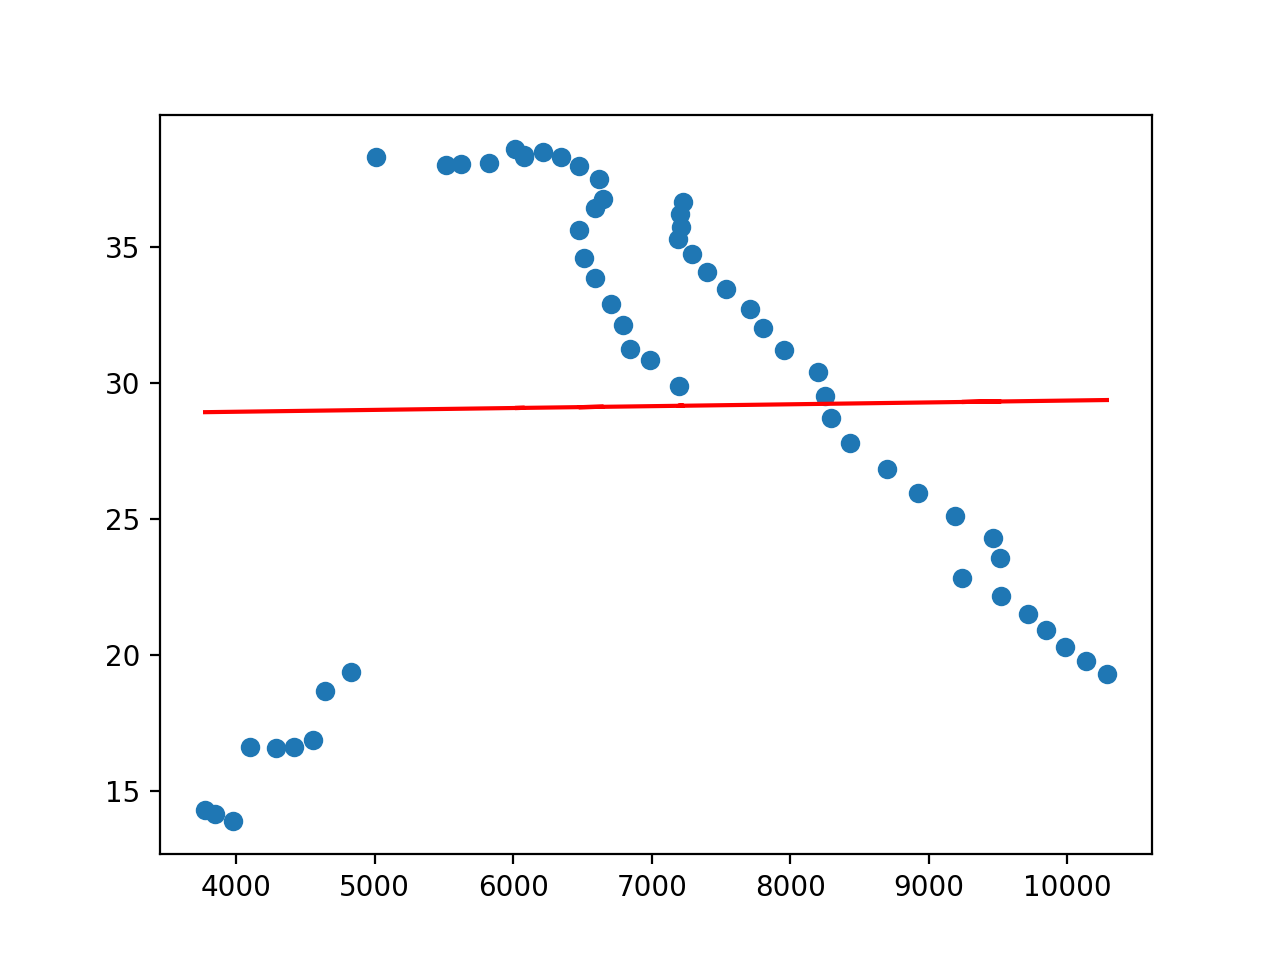

In [290]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')